![Doordash](https://raw.githubusercontent.com/interviewquery/takehomes/doordash_1/doordash_1/logo.png)
# Overview

In this exercise, you will use your machine learning experience to solve
a straightforward but challenging prediction​ ​problem.​ ​The​ ​exercise​
​contains two​​ parts​

Building​ ​a​ ​machine​ ​learning​ model​ ​ ​for​ ​a​ ​prediction ​ task​


In this, we would love to have you exhibit your modeling skills. You
will be evaluated on the following - performance on the test set,
feature engineering choices including features used and encoding of
features, data processing, choice of models used, description of model
performance and insights and observations from the​ ​model.



# Problem ​Description

When​ a​ ​consumer​ ​places​ ​an​ ​order​ ​on​ DoorDash,​​ we​ ​ show​ ​ the​ ​ ​expected ​
​time of​​ ​delivery.​ ​It​ ​is​ ​very ​important​ ​for​ DoorDash to get this right, as it has a big impact on consumer experience. In this exercise, you will build a model to predict the
estimated time taken for a delivery and write an application that can
make these predictions.

Concretely, for a given delivery you must predict the ​**total delivery
duration seconds** , i.e., the time taken from

- Start:​ ​the​ ​time​ ​consumer​ ​submits​ ​the​ ​order ​ (​`created_at`) ​ to​
- End:​ ​when​ ​the​ ​order​ ​will​ ​be​ ​delivered​ to​ ​ ​the​ consumer​​
​(`actual_delivery_time`).

To​ ​help​ ​with​ ​this,​ ​we​ ​have​ ​provided

-   `historical_data.csv`:​ ​table​ ​of​ ​historical​ ​deliveries

# Requirements


-   Build a model to predict the total delivery duration seconds (as
    defined above). Feel free to generate additional​ ​features​ ​from​ ​the ​ given​ ​ data​ ​ to​ ​ improve​ ​ model​ ​performance.​
-   Explain a) model(s) used, b) how you evaluated your model
    performance on the historical data, c) any data processing you
    performed on the data, d) feature engineering choices you made
    and e) other information​ ​you​ ​would​ ​like​ ​us​ ​to​ ​know​ ​about​ ​your​
    ​modeling​ ​approach.
-   Based ​ on​ ​ the​ ​ ​findings ​​from​ ​the​ ​model,​ list​​ ​recommendations​ to​​
    ​reduce​ ​delivery​ ​time







In [ ]:
!cat data_description.txt

cat: data_description.txt: No such file or directory


In [1]:
!git clone --branch doordash_1 https://github.com/interviewquery/takehomes.git
%cd takehomes/doordash_1
!ls

Cloning into 'takehomes'...
remote: Enumerating objects: 1963, done.
remote: Counting objects: 100% (1963/1963), done.
remote: Compressing objects: 100% (1220/1220), done.
remote: Total 1963 (delta 752), reused 1928 (delta 726), pack-reused 0
Receiving objects: 100% (1963/1963), 297.43 MiB | 10.89 MiB/s, done.
Resolving deltas: 100% (752/752), done.
Updating files: 100% (7/7), done.
/content/takehomes/doordash_1
data_description.txt  historical_data.csv  metadata.json
data_to_predict.json  logo.png		   takehomefile.ipynb


In [2]:
# Write your code her
import pandas as pd

In [3]:
historical_data = pd.read_csv("historical_data.csv")

In [4]:
historical_data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [5]:
historical_data.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,196441.000000,197428.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000
mean,2.978706,3530.510272,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,308.560179,545.358935
std,1.524867,2053.496711,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830,90.139653,219.352902
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000
25%,2.000000,1686.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000
50%,3.000000,3592.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000
75%,4.000000,5299.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000
max,6.000000,6987.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000


In [6]:
historical_data.isnull().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

In [7]:
import pandas as pd

# Assuming 'df' is your DataFrame
num_rows, num_columns = historical_data.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)


Number of rows: 197428
Number of columns: 16


In [8]:
historical_data.dtypes

market_id                                       float64
created_at                                       object
actual_delivery_time                             object
store_id                                          int64
store_primary_category                           object
order_protocol                                  float64
total_items                                       int64
subtotal                                          int64
num_distinct_items                                int64
min_item_price                                    int64
max_item_price                                    int64
total_onshift_dashers                           float64
total_busy_dashers                              float64
total_outstanding_orders                        float64
estimated_order_place_duration                    int64
estimated_store_to_consumer_driving_duration    float64
dtype: object

In [9]:
historical_data.isnull().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

In [10]:
historical_data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [11]:
import pandas as pd

# Assuming 'df' is your DataFrame
data_types = historical_data.dtypes

print("Data Types of Each Column:")
print(data_types)



Data Types of Each Column:
market_id                                       float64
created_at                                       object
actual_delivery_time                             object
store_id                                          int64
store_primary_category                           object
order_protocol                                  float64
total_items                                       int64
subtotal                                          int64
num_distinct_items                                int64
min_item_price                                    int64
max_item_price                                    int64
total_onshift_dashers                           float64
total_busy_dashers                              float64
total_outstanding_orders                        float64
estimated_order_place_duration                    int64
estimated_store_to_consumer_driving_duration    float64
dtype: object


In [12]:
historical_data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [13]:
# Convert timestamps to datetime objects
historical_data['created_at'] = pd.to_datetime(historical_data['created_at'])
historical_data['actual_delivery_time'] = pd.to_datetime(historical_data['actual_delivery_time'])


In [14]:
historical_data['created_at']

0        2015-02-06 22:24:17
1        2015-02-10 21:49:25
2        2015-01-22 20:39:28
3        2015-02-03 21:21:45
4        2015-02-15 02:40:36
                 ...        
197423   2015-02-17 00:19:41
197424   2015-02-13 00:01:59
197425   2015-01-24 04:46:08
197426   2015-02-01 18:18:15
197427   2015-02-08 19:24:33
Name: created_at, Length: 197428, dtype: datetime64[ns]

In [15]:
historical_data['order_duration'] = (historical_data['actual_delivery_time'] - historical_data['created_at']).dt.total_seconds()

In [16]:
historical_data['order_duration']

0         3779.0
1         4024.0
2         1781.0
3         3075.0
4         2390.0
           ...  
197423    3907.0
197424    3383.0
197425    3008.0
197426    3907.0
197427    2228.0
Name: order_duration, Length: 197428, dtype: float64

In [17]:
historical_data.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration', 'order_duration'],
      dtype='object')

In [18]:
historical_data['busy_dashers_ratio']= historical_data['total_busy_dashers']/historical_data['total_onshift_dashers']

In [19]:
historical_data['non_preparation_duration'] = historical_data['estimated_store_to_consumer_driving_duration']+historical_data['estimated_order_place_duration']

In [20]:
order_protocol_dummies = pd.get_dummies(historical_data.order_protocol)

In [21]:
order_protocol_dummies = order_protocol_dummies.add_prefix('order_protocol-')

In [22]:
order_protocol_dummies.head()

,order_protocol-1.0,order_protocol-2.0,order_protocol-3.0,order_protocol-4.0,order_protocol-5.0,order_protocol-6.0,order_protocol-7.0
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [23]:
market_id_dummies = pd.get_dummies(historical_data.market_id)
market_id_dummies = market_id_dummies.add_prefix('market_id')

In [24]:
market_id_dummies.head()

,market_id1.0,market_id2.0,market_id3.0,market_id4.0,market_id5.0,market_id6.0
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [25]:
#create distionary with most repeated categories of each store to fill null rows where it is possible
store_id_unique = historical_data['store_id'].unique().tolist()
store_id_category = {store_id:historical_data[historical_data.store_id == store_id].store_primary_category.mode() for store_id in store_id_unique}

In [26]:
import numpy as np

In [27]:
def fill(store_id):
  try:
    return store_id_category[store_id].values[0]
  except:
    return np.nan
#filling null values
historical_data['nan_free_store_primary_category'] = historical_data.store_id.apply(fill)

In [28]:
#creating dummies for store primary category
store_primary_category_dummies = pd.get_dummies(historical_data.nan_free_store_primary_category)
store_primary_category_dummies = store_primary_category_dummies.add_prefix('category_')
store_primary_category_dummies.head()

,category_afghan,category_african,category_alcohol,category_alcohol-plus-food,category_american,category_argentine,category_asian,category_barbecue,category_belgian,category_brazilian,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df = historical_data.drop(columns = ['created_at','market_id','store_id','store_primary_category','actual_delivery_time','nan_free_store_primary_category','order_protocol'])

In [30]:
df = pd.concat([df,order_protocol_dummies,market_id_dummies,store_primary_category_dummies],axis =1)

In [31]:
#converting all the col types to float
df = df.astype("float32")

In [32]:
df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,33.0,14.0,21.0,446.0,861.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,1.0,2.0,2.0,446.0,690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,1.0,0.0,0.0,446.0,690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,1.0,1.0,2.0,446.0,289.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,6.0,6.0,9.0,446.0,650.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df.describe()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
count,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000,...,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000
mean,3.196391,2682.331543,2.670791,686.218506,1159.588623,44.808094,41.739746,58.050064,308.560181,545.358948,...,0.000815,0.000187,0.005465,0.011300,0.000740,0.037254,0.001175,0.001433,0.004234,0.030928
std,2.666546,1823.093750,1.630255,522.038635,558.411377,34.526787,32.145733,52.661831,90.139648,219.352905,...,0.028545,0.013689,0.073725,0.105701,0.027184,0.189384,0.034260,0.037834,0.064935,0.173122
min,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
df['busy_dashers_ratio'].describe()

count    1.775900e+05
mean              NaN
std               NaN
min              -inf
25%      8.269231e-01
50%      9.622642e-01
75%      1.000000e+00
max               inf
Name: busy_dashers_ratio, dtype: float64

In [35]:
#replacing inf with nan and dropping nan
df.replace([np.inf,-np.inf],np.nan,inplace = True)
df.dropna(inplace = True)

In [36]:
df.shape

(177070, 100)

***REMOVING REDUNDENCIES***AND COLLLINEARITY






In [37]:
corr = df.corr()
mask = np.triu(np.ones_like(corr,dtype = bool))

<Axes: >

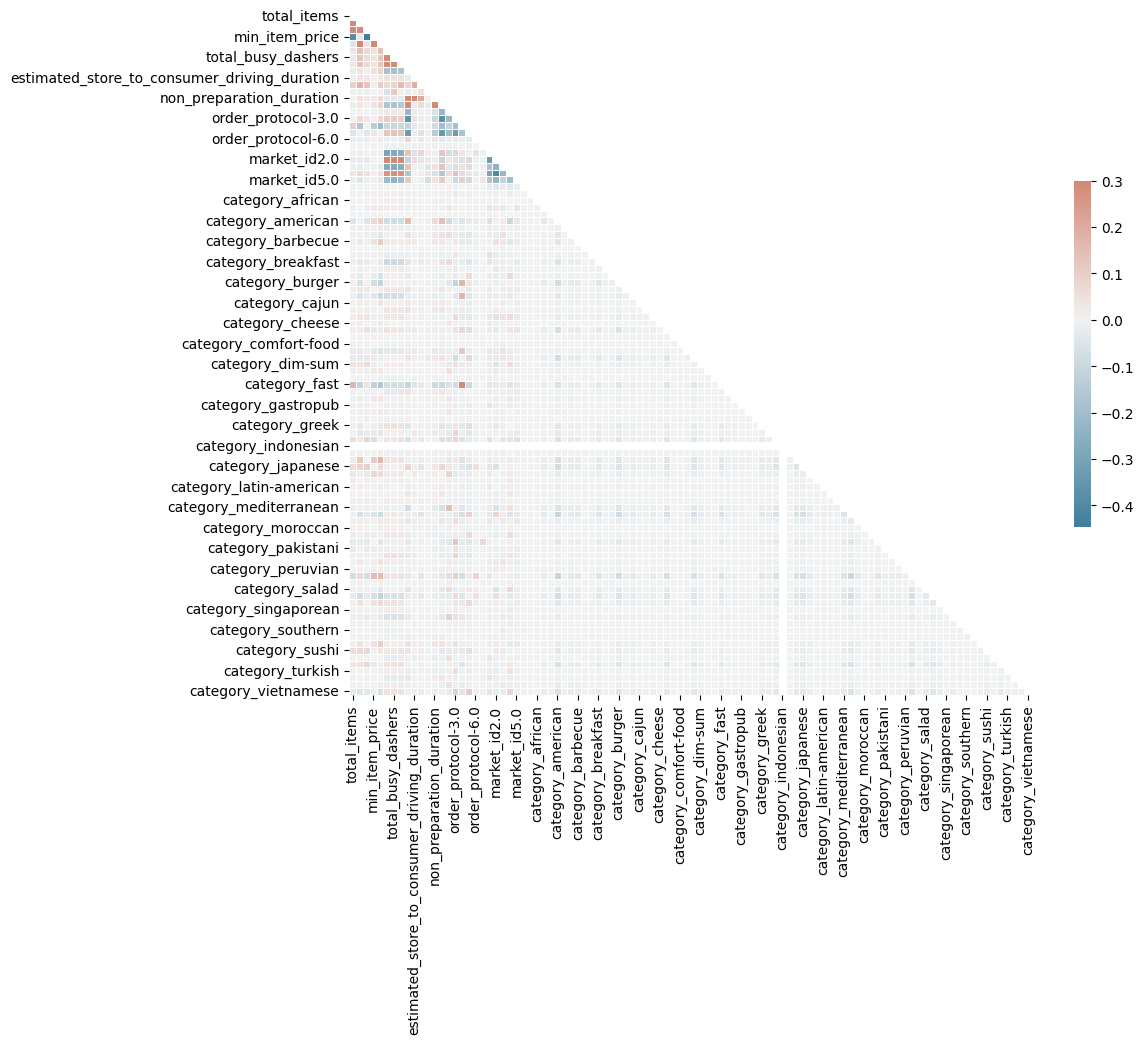

In [38]:
# setting up matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0, square=True, linewidth=0.5, cbar_kws={"shrink": 0.5})


In [39]:
#getting redundant features
def get_redundant_pairs(df):
  pairs_to_drop = set()
  cols = df.columns
  for i in range(0, df.shape[1]):
    for j in range(0,i+1):
      pairs_to_drop.add((cols[i],cols[j]))
  return pairs_to_drop

In [40]:
def get_top_abs_correlation(df, n = 5):
  au_corr = df.corr().abs().unstack()
  labels_to_drop = get_redundant_pairs(df)
  au_corr = au_corr.drop(labels = labels_to_drop).sort_values(ascending = False)
  return au_corr[0:n]

In [41]:
#top correlations
print(get_top_abs_correlation(df,20))

total_onshift_dashers                         total_busy_dashers          0.941741
                                              total_outstanding_orders    0.934639
total_busy_dashers                            total_outstanding_orders    0.931295
estimated_store_to_consumer_driving_duration  non_preparation_duration    0.923086
estimated_order_place_duration                order_protocol-1.0          0.897645
total_items                                   num_distinct_items          0.758146
subtotal                                      num_distinct_items          0.682890
total_items                                   subtotal                    0.557175
min_item_price                                max_item_price              0.541241
subtotal                                      max_item_price              0.507947
order_protocol-4.0                            category_fast               0.489946
num_distinct_items                            min_item_price              0.446733
mark

In [42]:
df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,33.0,14.0,21.0,446.0,861.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,1.0,2.0,2.0,446.0,690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,1.0,0.0,0.0,446.0,690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,1.0,1.0,2.0,446.0,289.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,6.0,6.0,9.0,446.0,650.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
df = historical_data.drop(columns = ['created_at','market_id','store_id','store_primary_category','actual_delivery_time','nan_free_store_primary_category','order_protocol'])

In [44]:
df = pd.concat([df,order_protocol_dummies,store_primary_category_dummies],axis = 1)

In [45]:
#dropping redundant and correlated features

df = df.drop(columns =['total_onshift_dashers','total_busy_dashers','category_indonesian','non_preparation_duration'])

In [46]:
df = df.astype('float32')
df.replace([np.inf,-np.inf],np.nan,inplace = True)
df.dropna(inplace = True)
df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,order_duration,busy_dashers_ratio,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,21.0,446.0,861.0,3779.0,0.424242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,2.0,446.0,690.0,4024.0,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,0.0,446.0,690.0,1781.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,2.0,446.0,289.0,3075.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,9.0,446.0,650.0,2390.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
def get_top_abs_correlation(df, n = 5):
  au_corr = df.corr().abs().unstack()
  labels_to_drop = get_redundant_pairs(df)
  au_corr = au_corr.drop(labels = labels_to_drop).sort_values(ascending = False)
  return au_corr[0:n]

In [48]:
#top correlations
print(get_top_abs_correlation(df,20))

estimated_order_place_duration  order_protocol-1.0    0.897645
total_items                     num_distinct_items    0.758146
subtotal                        num_distinct_items    0.682890
total_items                     subtotal              0.557175
min_item_price                  max_item_price        0.541241
subtotal                        max_item_price        0.507947
order_protocol-4.0              category_fast         0.489946
num_distinct_items              min_item_price        0.446733
total_items                     min_item_price        0.389277
order_protocol-1.0              order_protocol-3.0    0.373581
estimated_order_place_duration  order_protocol-3.0    0.364170
order_protocol-1.0              order_protocol-5.0    0.342345
estimated_order_place_duration  order_protocol-5.0    0.333291
order_protocol-3.0              order_protocol-5.0    0.332533
order_protocol-1.0              order_protocol-2.0    0.226903
estimated_order_place_duration  order_protocol-2.0    0

In [49]:
df = historical_data.drop(columns = ['created_at','market_id','store_id','store_primary_category','actual_delivery_time','nan_free_store_primary_category','order_protocol'])
df = pd.concat([df,order_protocol_dummies,store_primary_category_dummies],axis = 1)
#dropping redundant and correlated features

df = df.drop(columns =['total_onshift_dashers','total_busy_dashers','category_indonesian','non_preparation_duration'])
df = df.astype('float32')
df.replace([np.inf,-np.inf],np.nan,inplace = True)
df.dropna(inplace = True)
df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,order_duration,busy_dashers_ratio,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,21.0,446.0,861.0,3779.0,0.424242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,2.0,446.0,690.0,4024.0,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,0.0,446.0,690.0,1781.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,2.0,446.0,289.0,3075.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,9.0,446.0,650.0,2390.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
df['per_dist_items_of_total'] = df['num_distinct_items']/df['total_items']
df['avg_price_per_item'] = df['subtotal']/df['total_items']
df.drop(columns = ['num_distinct_items','subtotal'],inplace = True)
print(get_top_abs_correlation(df,20))

estimated_order_place_duration  order_protocol-1.0         0.897645
min_item_price                  avg_price_per_item         0.860580
max_item_price                  avg_price_per_item         0.770382
min_item_price                  max_item_price             0.541241
order_protocol-4.0              category_fast              0.489946
total_items                     per_dist_items_of_total    0.445751
                                min_item_price             0.389277
order_protocol-1.0              order_protocol-3.0         0.373581
estimated_order_place_duration  order_protocol-3.0         0.364170
order_protocol-1.0              order_protocol-5.0         0.342345
estimated_order_place_duration  order_protocol-5.0         0.333291
order_protocol-3.0              order_protocol-5.0         0.332533
total_items                     avg_price_per_item         0.310759
order_protocol-1.0              order_protocol-2.0         0.226903
per_dist_items_of_total         avg_price_per_it

In [51]:
df.shape

(177070, 90)

In [52]:
df = historical_data.drop(columns = ['created_at','market_id','store_id','store_primary_category','actual_delivery_time','nan_free_store_primary_category','order_protocol'])
df = pd.concat([df,store_primary_category_dummies],axis = 1)
#dropping redundant and correlated features

df = df.drop(columns =['total_onshift_dashers','total_busy_dashers','category_indonesian','non_preparation_duration'])
df = df.astype('float32')
df.replace([np.inf,-np.inf],np.nan,inplace = True)
df.dropna(inplace = True)
df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,order_duration,busy_dashers_ratio,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,21.0,446.0,861.0,3779.0,0.424242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,2.0,446.0,690.0,4024.0,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,0.0,446.0,690.0,1781.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,2.0,446.0,289.0,3075.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,9.0,446.0,650.0,2390.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
print(get_top_abs_correlation(df,20))

total_items                                   num_distinct_items                0.758146
subtotal                                      num_distinct_items                0.682890
total_items                                   subtotal                          0.557175
min_item_price                                max_item_price                    0.541241
subtotal                                      max_item_price                    0.507947
num_distinct_items                            min_item_price                    0.446733
total_items                                   min_item_price                    0.389277
estimated_store_to_consumer_driving_duration  order_duration                    0.188418
subtotal                                      order_duration                    0.172312
total_outstanding_orders                      estimated_order_place_duration    0.171049
total_items                                   category_fast                     0.170988
max_item_price       

In [54]:
df['price_range'] = df['max_item_price'] - df['min_item_price']
df.drop(columns = ['max_item_price','min_item_price'],inplace = True)
print(get_top_abs_correlation(df,20))

total_items                                   num_distinct_items                0.758146
subtotal                                      num_distinct_items                0.682890
total_items                                   subtotal                          0.557175
subtotal                                      price_range                       0.511719
num_distinct_items                            price_range                       0.499604
total_items                                   price_range                       0.333304
estimated_store_to_consumer_driving_duration  order_duration                    0.188418
subtotal                                      order_duration                    0.172312
total_outstanding_orders                      estimated_order_place_duration    0.171049
total_items                                   category_fast                     0.170988
total_outstanding_orders                      order_duration                    0.157604
estimated_order_place

In [55]:
df.shape

(177070, 82)

MULTICOLLINEARITY

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
#computing VIF score using variance_inflation_factor() function
def compute_vif(features):
  vif_data = pd.DataFrame()
  vif_data['features'] = features
  vif_data['VIF'] = [variance_inflation_factor(df[features].values,i) for i in range(len(features))]
  return vif_data.sort_values(by = ['VIF']).reset_index(drop = True)

In [58]:
features = df.drop(columns = ['order_duration']).columns.to_list()
vif_data = compute_vif(features)
vif_data

,features,VIF
0,category_alcohol-plus-food,1.000161
1,category_chocolate,1.000215
2,category_belgian,1.000429
3,category_russian,1.001755
4,category_gluten-free,1.002434
...,...,...
76,busy_dashers_ratio,6.355145
77,estimated_store_to_consumer_driving_duration,7.192124
78,subtotal,7.549255
79,num_distinct_items,12.737138


In [59]:
multicollinearity = True
while multicollinearity:
  highest_vif_feature = vif_data['features'].values.tolist()[-1]
  print("removing features with highest vif",highest_vif_feature)
  features.remove(highest_vif_feature)
  vif_data = compute_vif(features)
  multicollinearity = False if len(vif_data[vif_data.VIF >20]) == 0 else True

selected_features = vif_data['features'].values.tolist()
vif_data

removing features with highest vif estimated_order_place_duration


,features,VIF
0,category_chocolate,1.000068
1,category_alcohol-plus-food,1.000114
2,category_belgian,1.000145
3,category_russian,1.000994
4,category_gluten-free,1.001140
...,...,...
75,total_items,6.229229
76,busy_dashers_ratio,6.354070
77,estimated_store_to_consumer_driving_duration,7.190795
78,subtotal,7.542170


FEATURE ENGINEERING

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
#selected features are selected in multicollinearty check part
X = df[selected_features]
y = df['order_duration']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)


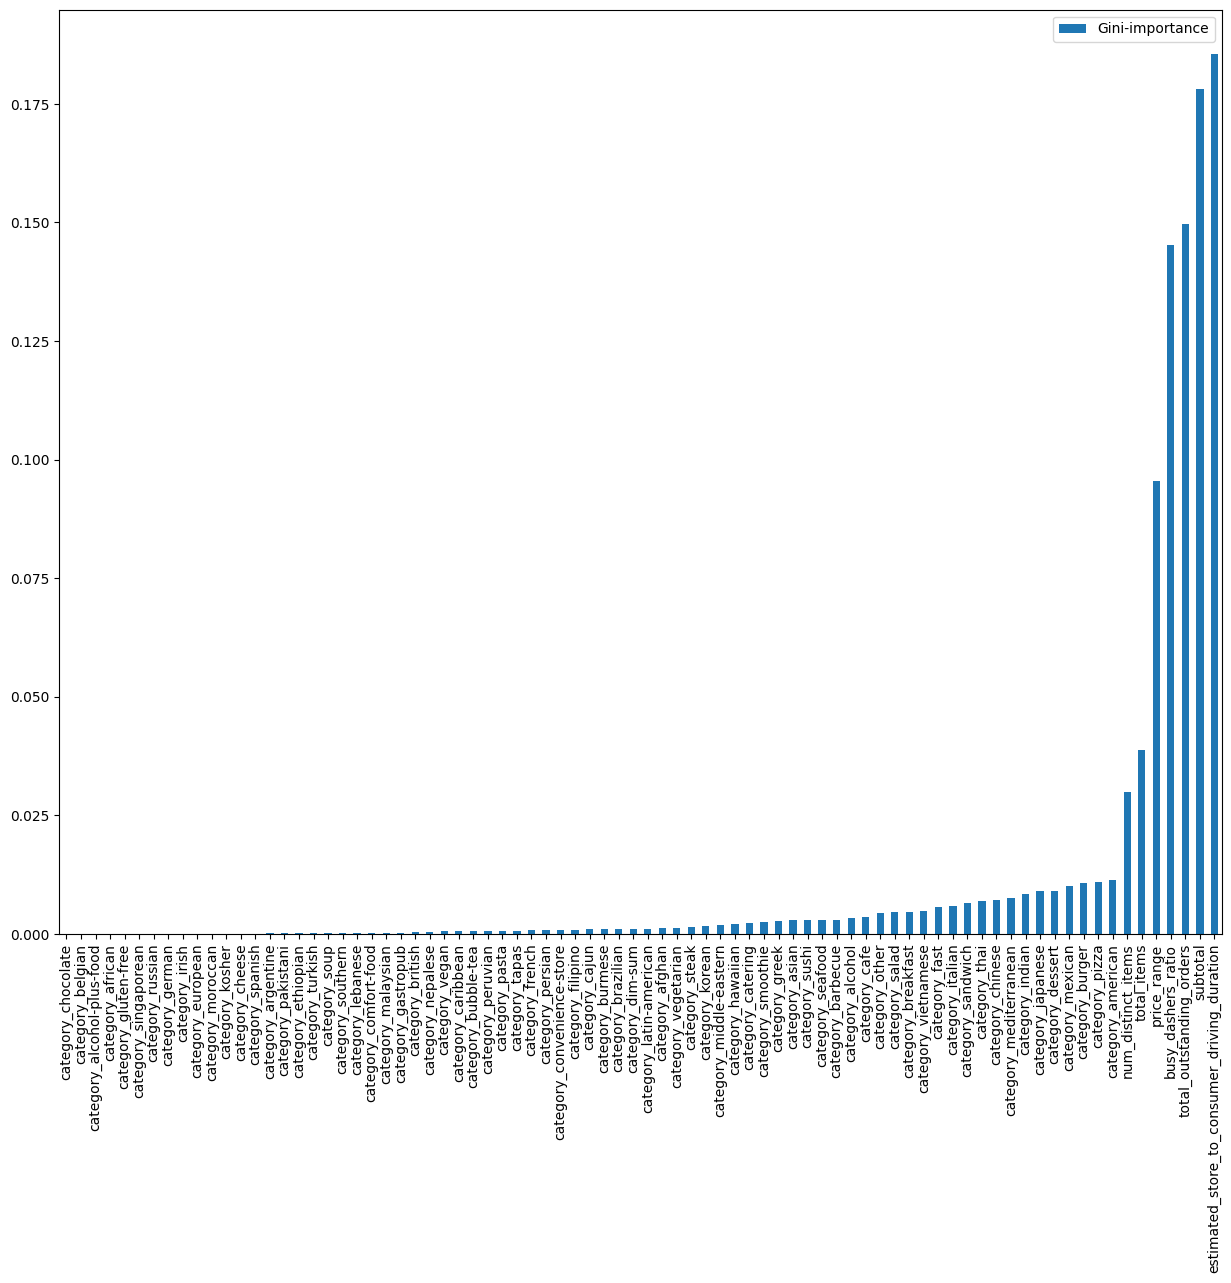

In [61]:
feature_names = [f'features {i}' for i in range((X.shape[1]))]
forest = RandomForestRegressor(random_state=42)

# Assuming X_train and y_train are your training data
forest.fit(X_train, y_train)

feats = {}  # a dictionary to hold feature_name: feature_importance
for feature, importance in zip(X.columns, forest.feature_importances_):
    feats[feature] = importance

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90, figsize=(15, 12))
plt.show()


In [62]:
importances.sort_values(by = 'Gini-importance')[-35:].index.tolist()

['category_middle-eastern',
 'category_hawaiian',
 'category_catering',
 'category_smoothie',
 'category_greek',
 'category_asian',
 'category_sushi',
 'category_seafood',
 'category_barbecue',
 'category_alcohol',
 'category_cafe',
 'category_other',
 'category_salad',
 'category_breakfast',
 'category_vietnamese',
 'category_fast',
 'category_italian',
 'category_sandwich',
 'category_thai',
 'category_chinese',
 'category_mediterranean',
 'category_indian',
 'category_japanese',
 'category_dessert',
 'category_mexican',
 'category_burger',
 'category_pizza',
 'category_american',
 'num_distinct_items',
 'total_items',
 'price_range',
 'busy_dashers_ratio',
 'total_outstanding_orders',
 'subtotal',
 'estimated_store_to_consumer_driving_duration']

<ipython-input-63-db04e971a68a>:9: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,81,1)


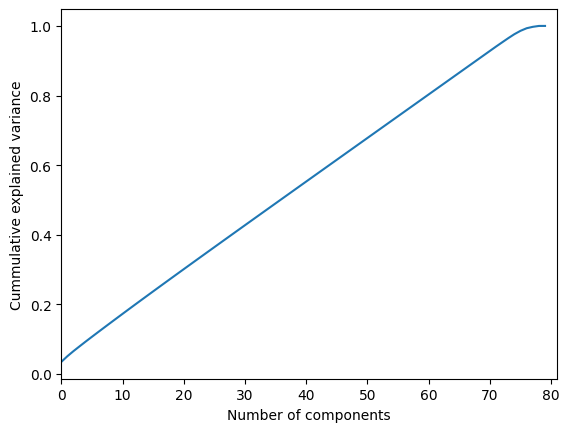

In [63]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X_Train = X_train.values
X_Train = np.asarray(X_Train)
#finding normalized array of X_Train
X_std = StandardScaler().fit_transform(X_Train)
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,81,1)
plt.xlabel("Number of components")
plt.ylabel("Cummulative explained variance")
plt.show()



In [64]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [108]:
def scale(scaler, X, y):
    # Create a new instance of the scaler for features
    X_scaler = scaler
    X_scaled = X_scaler.fit_transform(X)

    # Create a new instance of the scaler for target variables
    y_scaler = scaler
    y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))  # Reshape y to a column vector for fitting

    return X_scaled, y_scaled, X_scaler, y_scaler


In [109]:
from sklearn.preprocessing import MinMaxScaler
X_scaled, y_scaled, X_scaler, y_scaler = scale(MinMaxScaler(), X, y)

X_train_scaled ,X_test_scaled,y_train_scaled,y_test_scaled = train_test_split(X_scaled,y_scaled,test_size = 0.2,random_state = 42)

In [110]:
from sklearn.metrics import mean_squared_error

def rmse_with_inv_transform(scaler, y_test, y_pred_scaled, model_name):
    y_predict = scaler.inverse_transform(y_pred_scaled.reshape(-1,1))
    rmse_error = mean_squared_error(y_test,y_predict[:,0],squared = False)
    print("Error = "'{}'.format(rmse_error)+"in"+model_name)
    return rmse_error,y_predict


In [111]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn import linear_model

In [112]:
#create a generic function which can work multiple machine learning models
def make_regression(X_train,y_train,X_test,y_test,model,model_name,verbose = True):
  model.fit(X_train,y_train)
  y_predict = model.predict(X_train)
  train_error =mean_squared_error(y_train,y_predict,squared = False)
  y_predict = model.predict(X_test)
  test_error = mean_squared_error(y_test,y_predict,squared = False)
  if verbose:
    print("Train error = "'{}'.format(train_error)+"in"+model_name)
    print("test error = "'{}'.format(test_error)+"in"+model_name)
  trained_model = model
  return trained_model,y_predict,train_error,test_error


In [113]:
pred_dict = {
    "regression_model" :[],
    "feature_set" :[],
    "scaler_name" :[],
    "RMSE" :[],
}
regression_models = {
    "Ridge" :linear_model.Ridge(),
    "DecisionTree":tree.DecisionTreeRegressor(max_depth = 6),
    "XGBoost":XGBRegressor(),
    "LGBM":LGBMRegressor(),
    "MLP":MLPRegressor()
}
feature_sets={
    "full dataset" : X.columns.to_list(),
    "selected_features_40":importances.sort_values(by = 'Gini-importance')[-40:].index.tolist(),
    "selected_features_20":importances.sort_values(by = 'Gini-importance')[-20:].index.tolist(),
    "selected_features_10":importances.sort_values(by = 'Gini-importance')[-10:].index.tolist()

}
scalers = {
    "Standard scaler":StandardScaler(),
    "MinMax scaler": MinMaxScaler(),
    "Not Scale":None,
}

In [ ]:
pred_df = pd.DataFrame(pred_dict)

In [ ]:
pred_df

,regression_model,feature_set,scaler_name,rmse


In [ ]:
pred_df.plot(kind = 'bar',figsize = (12,8))


In [120]:
df['order_duration']

0         3779.0
1         4024.0
2         1781.0
3         3075.0
4         2390.0
           ...  
197423    3907.0
197424    3383.0
197425    3008.0
197426    3907.0
197427    2228.0
Name: order_duration, Length: 177070, dtype: float32

In [121]:
df['estimated_store_to_consumer_driving_duration']

0         861.0
1         690.0
2         690.0
3         289.0
4         650.0
          ...  
197423    331.0
197424    915.0
197425    795.0
197426    384.0
197427    134.0
Name: estimated_store_to_consumer_driving_duration, Length: 177070, dtype: float32

In [125]:
df.columns

Index(['total_items', 'subtotal', 'num_distinct_items',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration', 'order_duration',
       'busy_dashers_ratio', 'category_afghan', 'category_african',
       'category_alcohol', 'category_alcohol-plus-food', 'category_american',
       'category_argentine', 'category_asian', 'category_barbecue',
       'category_belgian', 'category_brazilian', 'category_breakfast',
       'category_british', 'category_bubble-tea', 'category_burger',
       'category_burmese', 'category_cafe', 'category_cajun',
       'category_caribbean', 'category_catering', 'category_cheese',
       'category_chinese', 'category_chocolate', 'category_comfort-food',
       'category_convenience-store', 'category_dessert', 'category_dim-sum',
       'category_ethiopian', 'category_european', 'category_fast',
       'category_filipino', 'category_french', 'category_gastropub',
       'category_german', 'cat

In [122]:
df['prep_time'] = df['order_duration']-df['estimated_store_to_consumer_driving_duration']

In [119]:
scalers = {
    'Standard scaler':StandardScaler(),
}
feature_sets = {
    "selected_features_40" : importances.sort_values(by = "Gini-importance")[-40:].index.tolist(),
}

In [127]:
df[feature_set]

,category_latin-american,category_afghan,category_vegetarian,category_steak,category_korean,category_middle-eastern,category_hawaiian,category_catering,category_smoothie,category_greek,...,category_burger,category_pizza,category_american,num_distinct_items,total_items,price_range,busy_dashers_ratio,total_outstanding_orders,subtotal,estimated_store_to_consumer_driving_duration
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,4.0,4.0,682.0,0.424242,21.0,3441.0,861.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,2.000000,2.0,1900.0,690.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.000000,0.0,1900.0,690.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,6.0,1200.0,1.000000,2.0,6900.0,289.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,3.0,500.0,1.000000,9.0,3900.0,650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,3.0,304.0,1.000000,23.0,1389.0,331.0
197424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,6.0,420.0,0.916667,14.0,3010.0,915.0
197425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,5.0,99.0,1.051282,40.0,1836.0,795.0
197426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,12.0,1175.0,384.0


In [128]:
for feature_set_name in feature_sets.keys():
    feature_set = feature_sets[feature_set_name]

    for scaler_name in scalers.keys():
        print(f"Scaled with {scaler_name} included columns are {feature_set_name}")
        print("")

        for model_name in regression_models.keys():
            X = df[feature_set].drop(columns=['estimated_store_to_consumer_driving_duration'])
            y = df['prep_time']

            # Get indices
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            train_indices = X_train.index
            test_indices = X_test.index

            X_scaled, y_scaled, X_scaler, y_scaler = scale(scalers[scaler_name], X, y)
            X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
            _, y_predict_scaled, _, _ = make_regression(X_train_scaled, y_train_scaled[:, 0], X_test_scaled, y_test_scaled, regression_models[model_name], model_name)

            rmse_error, y_predict = rmse_with_inv_transform(y_scaler, y_test, y_predict_scaled, model_name)

            # Fix indentation here
            pred_dict["regression_model"].append(model_name)
            pred_dict['feature_set'].append(feature_set_name)
            pred_dict['scaler_name'].append(scaler_name)
            pred_dict['RMSE'].append(rmse_error)


Scaled with Standard scaler included columns are selected_features_40

Train error = 0.7865937352180481inRidge
test error = 1.5007867813110352inRidge
Error = 2057.5380859375inRidge
Train error = 0.7709586850892775inDecisionTree
test error = 1.4937015416666735inDecisionTree
Error = 2047.8244053381109inDecisionTree
Train error = 0.7171919941902161inXGBoost
test error = 1.4869211912155151inXGBoost
Error = 2038.5286865234375inXGBoost
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034704 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1182
[LightGBM] [Info] Number of data points in the train set: 141656, number of used features: 39
[LightGBM] [Info] Start training from score -0.002207
Train error = 0.7509745742900822inLGBM
test error = 1.4867648421864614inLGBM
Error = 2038.314377951186inLGBM
Train error = 0.7601120471954346inMLP
test error 

In [133]:
#choosing best performnace values and extract the predictions for preparation duration
pred_values_dict = {
    'order_duration':df['order_duration'][test_indices].values.tolist(),
    'prep_duration_prediction':y_predict[:,0].tolist(),
    'estimated_store_to_consumer_driving_duration' : df['estimated_store_to_consumer_driving_duration'][test_indices].values.tolist(),
    'estimated_order_place_duration' :df['estimated_order_place_duration'][test_indices].values.tolist()
}

In [136]:
values_df = pd.DataFrame.from_dict(pred_values_dict)

In [137]:
values_df

,order_duration,prep_duration_prediction,estimated_store_to_consumer_driving_duration,estimated_order_place_duration
0,2448.0,2171.486572,380.0,251.0
1,1839.0,1506.926880,747.0,446.0
2,1927.0,2555.634766,543.0,251.0
3,2657.0,1557.506958,445.0,251.0
4,3596.0,2208.091797,691.0,446.0
...,...,...,...,...
35409,9557.0,3352.467041,768.0,446.0
35410,1864.0,2574.925781,324.0,446.0
35411,2674.0,2250.785400,791.0,251.0
35412,2234.0,2215.469482,687.0,251.0


In [138]:
values_df['sum_total_delivery_duration'] = values_df['prep_duration_prediction']+values_df['estimated_store_to_consumer_driving_duration']

In [141]:
mean_squared_error(values_df['sum_total_delivery_duration'],values_df['order_duration'])

4170356.2525002873

In [143]:
X = values_df[['prep_duration_prediction','estimated_store_to_consumer_driving_duration','estimated_order_place_duration']]
y = values_df[['order_duration']]
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [144]:


regression_models = {
    "LinearReg": linear_model.LinearRegression(),
    "Ridge": linear_model.Ridge(),
    "DecisionTree": tree.DecisionTreeRegressor(max_depth=6),
    "RandomForest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "LGBM": LGBMRegressor(),
    "MLP": MLPRegressor(),
}

for model_name, model in regression_models.items():
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_predict, squared=False)
    print(f"RMSE of {model_name}: {rmse}")

RMSE of LinearReg: 993.2613867242846
RMSE of Ridge: 993.2613867271729
RMSE of DecisionTree: 4051.226607312527


<ipython-input-144-6eddadf98a7c>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RMSE of RandomForest: 2593.238627229207
RMSE of XGBoost: 4040.1788188665023
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 519
[LightGBM] [Info] Number of data points in the train set: 28331, number of used features: 3
[LightGBM] [Info] Start training from score 2869.174261
RMSE of LGBM: 1345.6559231172878


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE of MLP: 994.6467893006621
